<a href="https://colab.research.google.com/github/sathizz7/Guvi_Task7/blob/main/Random_Forest_Assign16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

**Importing the dataset**

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df['Purchased'].unique()

array([0, 1])

In [ ]:
ohe = OneHotEncoder(sparse = False)
gen = ohe.fit_transform(df[['Gender']])
gen = pd.DataFrame(gen)

In [ ]:
df.drop('Gender',axis =1, inplace = True)
df = pd.concat([df,gen], axis =1)
df.columns = ['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'sex_1', 'sex_2']

In [ ]:
df

,User ID,Age,EstimatedSalary,Purchased,sex_1,sex_2
0,15624510,19,19000,0,0.0,1.0
1,15810944,35,20000,0,0.0,1.0
2,15668575,26,43000,0,1.0,0.0
3,15603246,27,57000,0,1.0,0.0
4,15804002,19,76000,0,0.0,1.0
...,...,...,...,...,...,...
395,15691863,46,41000,1,1.0,0.0
396,15706071,51,23000,1,0.0,1.0
397,15654296,50,20000,1,1.0,0.0
398,15755018,36,33000,0,0.0,1.0


**Splitting the dataset into the Training set and Test set**

In [ ]:
X = df.drop('Purchased', axis = 1)
y = df['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest= train_test_split(X,y , random_state = 3)

In [ ]:
Xtrain

,User ID,Age,EstimatedSalary,sex_1,sex_2
75,15651983,34,112000,0.0,1.0
14,15628972,18,82000,0.0,1.0
47,15776348,27,54000,1.0,0.0
46,15798850,25,79000,0.0,1.0
379,15749381,58,23000,1.0,0.0
...,...,...,...,...,...
256,15609637,41,72000,1.0,0.0
131,15801247,33,31000,0.0,1.0
249,15753102,35,97000,1.0,0.0
152,15699247,31,76000,0.0,1.0


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
Xtrain = ss.fit_transform(Xtrain)
Xtest = ss.transform(Xtest)

**Fitting Random Forest to the Training set**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(Xtrain,ytrain)

RandomForestClassifier()

**Predicting the Test set results**

In [ ]:
print('Test_score', rf.score(Xtest, ytest))

ypred = rf.predict(Xtest)
print(ypred)

Test_score 0.88
[1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1
 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0]


**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest, ypred)

array([[58,  7],
       [ 5, 30]])

**Visualising the Training set results**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


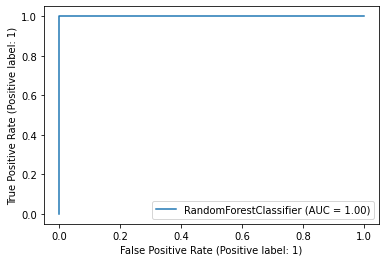

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, Xtrain,ytrain)

**Visualising the Test set results**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


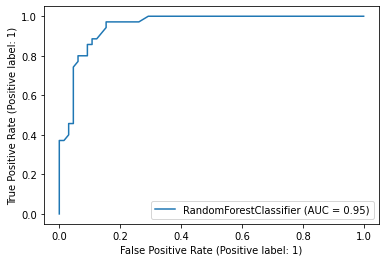

In [ ]:
plot_roc_curve(rf, Xtest,ytest)